In [1]:
# Import library
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Create data frame and replace missing values with NaN
missing_values = ["n/a", "na", "--"]
data=pd.read_csv('./Task.csv',na_values = missing_values)
data.head(2)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1


In [3]:
# Shape of dataframe
print('Data_shape: ',data.shape)
#Count all NaN in a DataFrame
print('Total_Null_values: ',data.isnull().sum().sum())
# column index of dataframe
print('Column_index: ', data.columns)
#Total unique value of columns molecule_name and conformation_name
print(' Total_molecule_name:', len(data['molecule_name'].unique()),'\n','Total_conformation_name: ', len(data['conformation_name'].unique()))

Data_shape:  (6598, 170)
Total_Null_values:  0
Column_index:  Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)
 Total_molecule_name: 102 
 Total_conformation_name:  6598


In [4]:
# Unique values of columns molecule_name and conformation_name
data['molecule_name'].unique()

array(['MUSK-211', 'MUSK-212', 'MUSK-213', 'MUSK-214', 'MUSK-215',
       'MUSK-217', 'MUSK-219', 'MUSK-224', 'MUSK-228', 'MUSK-238',
       'MUSK-240', 'MUSK-256', 'MUSK-273', 'MUSK-284', 'MUSK-287',
       'MUSK-294', 'MUSK-300', 'MUSK-306', 'MUSK-314', 'MUSK-321',
       'MUSK-322', 'MUSK-323', 'MUSK-330', 'MUSK-331', 'MUSK-333',
       'MUSK-344', 'MUSK-f152', 'MUSK-f158', 'MUSK-j33', 'MUSK-j51',
       'MUSK-jf15', 'MUSK-jf17', 'MUSK-jf46', 'MUSK-jf47', 'MUSK-jf58',
       'MUSK-jf59', 'MUSK-jf66', 'MUSK-jf67', 'MUSK-jf78', 'NON-MUSK-192',
       'NON-MUSK-197', 'NON-MUSK-199', 'NON-MUSK-200', 'NON-MUSK-207',
       'NON-MUSK-208', 'NON-MUSK-210', 'NON-MUSK-216', 'NON-MUSK-220',
       'NON-MUSK-226', 'NON-MUSK-232', 'NON-MUSK-233', 'NON-MUSK-244',
       'NON-MUSK-249', 'NON-MUSK-251', 'NON-MUSK-252', 'NON-MUSK-253',
       'NON-MUSK-270', 'NON-MUSK-271', 'NON-MUSK-286', 'NON-MUSK-288',
       'NON-MUSK-289', 'NON-MUSK-290', 'NON-MUSK-295', 'NON-MUSK-296',
       'NON-MUSK-297', 

In [5]:
# Grouping each unique value in column molecule_name and then count in each group
data.groupby("molecule_name")["conformation_name"].count()

molecule_name
MUSK-211         19
MUSK-212         31
MUSK-213         78
MUSK-214         27
MUSK-215         73
                 ..
NON-MUSK-j97      1
NON-MUSK-jf18     4
NON-MUSK-jf79     4
NON-MUSK-jp10     5
NON-MUSK-jp13    63
Name: conformation_name, Length: 102, dtype: int64

In [6]:
# group of first values from each group
grouping_data=data.groupby('molecule_name')
grouping_data.first()

,ID,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
molecule_name,,,,,,,,,,,,,,,,,,,,,
MUSK-211,1,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308,52,-7,39,126,156,-50,-112,96,1
MUSK-212,20,212_1+1,33,-158,-62,-71,-117,50,26,-146,...,-301,55,-71,-31,35,156,-60,-132,58,1
MUSK-213,51,213_1+1,109,-131,-62,-71,-117,54,20,-142,...,-298,59,23,245,251,148,-65,-132,11,1
MUSK-214,129,214_1+1,42,-197,-148,-92,-117,64,66,-60,...,-167,-192,55,127,143,152,-60,-127,57,1
MUSK-215,156,215_1+1,121,-197,-148,-91,-117,63,66,-60,...,-168,-192,-18,227,291,150,-60,-126,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NON-MUSK-j97,6522,j97_1+1,23,67,39,36,-117,-62,28,-150,...,-318,-200,20,29,65,251,-68,-231,70,0
NON-MUSK-jf18,6523,jf18_1+1,38,-101,-21,30,-116,-101,62,-26,...,-216,-206,-20,86,64,233,-71,-221,-22,0
NON-MUSK-jf79,6527,jf79_1+1,44,-103,-19,-87,-117,-13,-164,-59,...,-54,-123,-9,149,128,157,-66,-142,-2,0


In [7]:
# group of first molecule in column molecule_name
grouping_data.get_group('MUSK-212')

,ID,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
19,20,212_1+1,33,-158,-62,-71,-117,50,26,-146,...,-301,55,-71,-31,35,156,-60,-132,58,1
20,21,212_1+10,33,-158,-61,-77,-117,9,26,-131,...,-78,-135,-71,-30,35,157,-61,-132,58,1
21,22,212_1+11,32,-92,-60,-78,-117,10,38,-160,...,-82,-139,-63,-29,34,157,-61,-132,58,1
22,23,212_1+12,33,-104,-62,-78,-117,9,32,-141,...,-80,-137,-70,-29,34,157,-61,-132,58,1
23,24,212_1+13,33,-93,-60,-99,-117,73,37,-161,...,-302,-32,-63,-30,34,157,-61,-133,57,1
24,25,212_1+14,33,-93,-60,-99,-117,73,37,-161,...,-302,-33,-63,-30,34,157,-61,-133,57,1
25,26,212_1+15,33,-158,-62,-51,-117,-56,26,-129,...,-56,14,-71,-30,35,157,-61,-132,58,1
26,27,212_1+16,33,-159,-62,-99,-117,73,26,-147,...,-299,-32,-71,-31,35,157,-61,-133,57,1
27,28,212_1+17,32,-92,-60,-51,-117,-57,38,-154,...,-58,12,-63,-29,34,157,-61,-132,59,1
28,29,212_1+18,32,-93,-60,-50,-117,-57,38,-154,...,-58,12,-63,-29,34,157,-61,-132,58,1


In [8]:
grouping_data.head(1)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
19,20,MUSK-212,212_1+1,33,-158,-62,-71,-117,50,26,...,-301,55,-71,-31,35,156,-60,-132,58,1
50,51,MUSK-213,213_1+1,109,-131,-62,-71,-117,54,20,...,-298,59,23,245,251,148,-65,-132,11,1
128,129,MUSK-214,214_1+1,42,-197,-148,-92,-117,64,66,...,-167,-192,55,127,143,152,-60,-127,57,1
155,156,MUSK-215,215_1+1,121,-197,-148,-91,-117,63,66,...,-168,-192,-18,227,291,150,-60,-126,56,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6521,6522,NON-MUSK-j97,j97_1+1,23,67,39,36,-117,-62,28,...,-318,-200,20,29,65,251,-68,-231,70,0
6522,6523,NON-MUSK-jf18,jf18_1+1,38,-101,-21,30,-116,-101,62,...,-216,-206,-20,86,64,233,-71,-221,-22,0
6526,6527,NON-MUSK-jf79,jf79_1+1,44,-103,-19,-87,-117,-13,-164,...,-54,-123,-9,149,128,157,-66,-142,-2,0
6530,6531,NON-MUSK-jp10,jp10_1+1,40,-198,-165,147,-117,64,-160,...,-317,-203,-103,136,102,227,-73,-215,-10,0


In [9]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [10]:
# removing 'ID','molecule_name','conformation_name','class' from columns
columns_list=list(data.columns)
columns_list= [name for name in columns_list if name not in ('ID','molecule_name','conformation_name','class')]

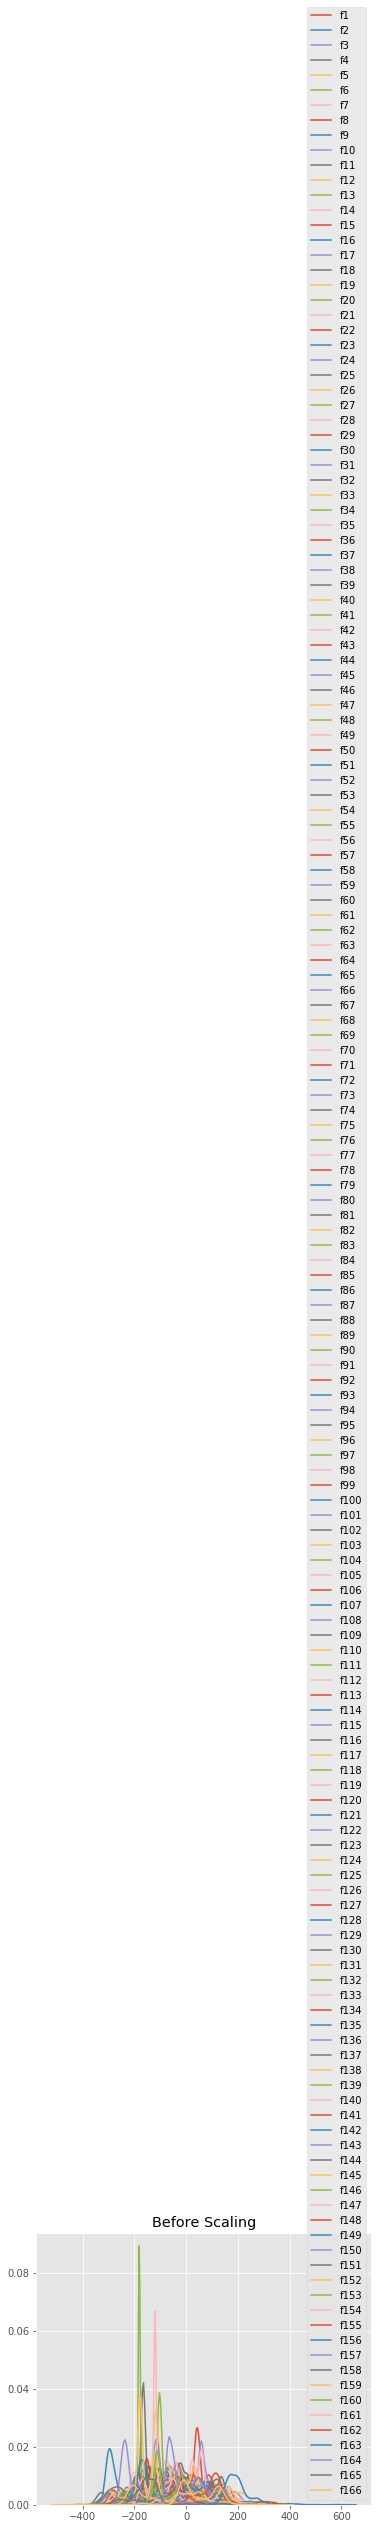

In [11]:
# plotting normal distribution of each features of data
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

fig, ax1 = plt.subplots(ncols=1, figsize=(6, 5))

ax1.set_title('Before Scaling')
for name in columns_list:
    sns.kdeplot(data[name], ax=ax1)
    
plt.show()

In [12]:
# creating features_data for splitting into training and testing dataset
data_removed_label=data.drop(['class'],axis=1)
# creating label_data for splitting into training and testing dataset
data_label=data[['class']]

In [13]:
# Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
data_train,data_val,data_train_label,data_val_label=train_test_split(data_removed_label,data_label,test_size=0.2,random_state=1)

In [14]:
# Removing Unnecessary features from training and testing dataset which we may use later.
data_train_removed_column=data_train.drop(['ID','molecule_name','conformation_name'],axis=1)
data_val_removed_column=data_val.drop(['ID','molecule_name','conformation_name'],axis=1)

In [15]:
# Preprocessing the training and testing dataset with standard Scaler
from sklearn.preprocessing import StandardScaler
stds=StandardScaler()
scaled_data_train_array=stds.fit_transform(data_train_removed_column)
scaled_data_val_array=stds.transform(data_val_removed_column)

In [16]:
# Convert scaled training and testing arrays into dataframe 
scaled_data_val=pd.DataFrame(scaled_data_val_array,columns=columns_list)
scaled_data_train=pd.DataFrame(scaled_data_train_array,columns=columns_list)

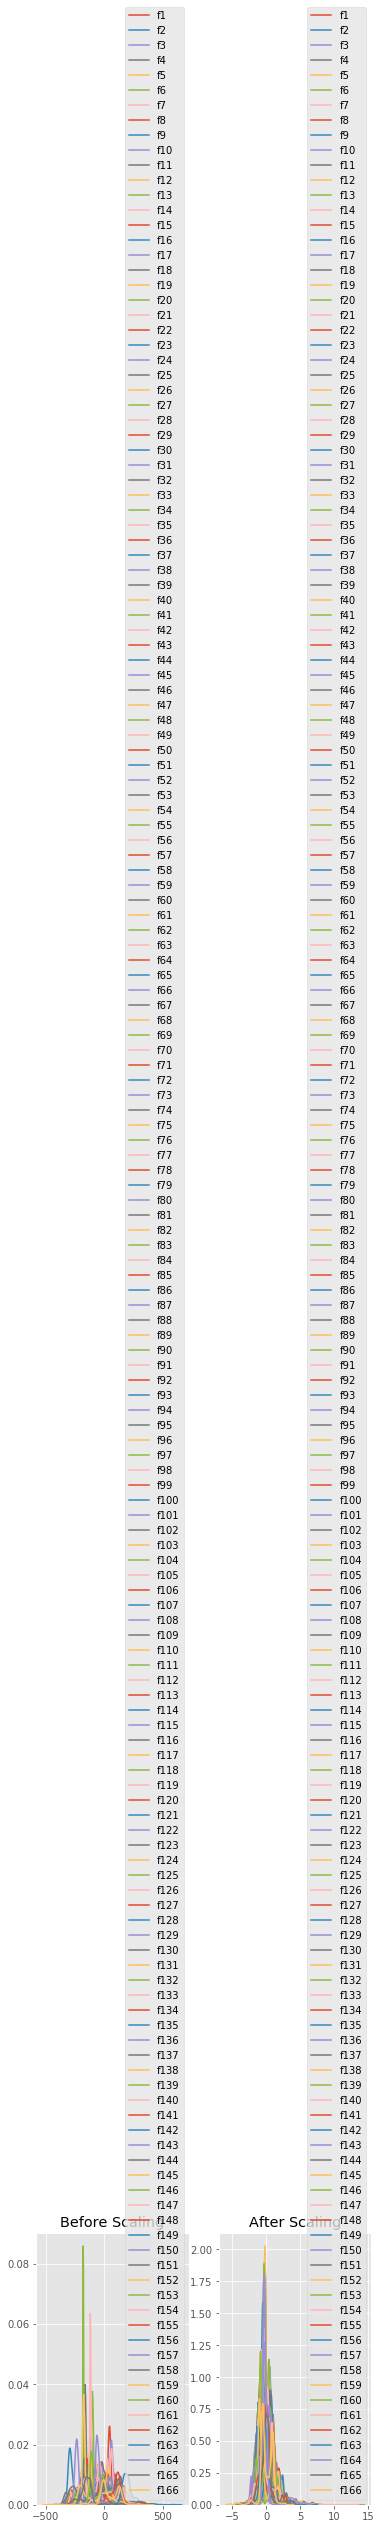

In [17]:
#  plotting normal distribution of each features of training_data before scaling and after scaling
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
for name in columns_list:
    sns.kdeplot(data_train_removed_column[name], ax=ax1)

ax2.set_title('After Scaling')
for name in columns_list:
    sns.kdeplot(scaled_data_train[name], ax=ax2)

plt.show()

## MLP model

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,make_scorer

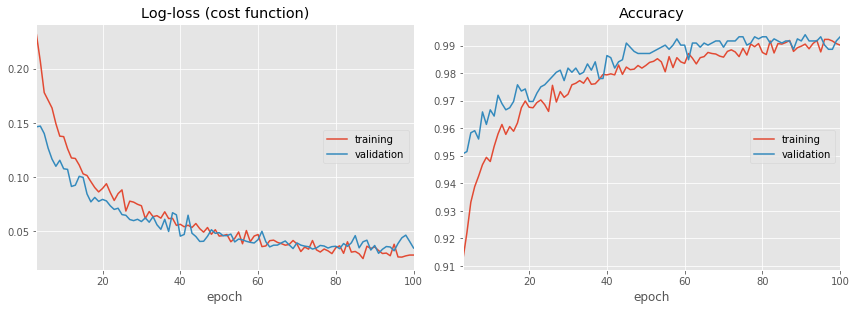

Log-loss (cost function):
training   (min:    0.025, max:    0.460, cur:    0.028)
validation (min:    0.030, max:    0.179, cur:    0.035)

Accuracy:
training   (min:    0.785, max:    0.992, cur:    0.990)
validation (min:    0.937, max:    0.994, cur:    0.993)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# create the model
new_model=Sequential()
n_cols=scaled_data_train.shape[1]
new_model.add(Dense(100,activation='tanh',input_shape=(n_cols,)))
new_model.add(Dropout(0.5))
new_model.add(Dense(100,activation='tanh'))
new_model.add(Dropout(0.5))
new_model.add(Dense(100,activation='tanh'))
new_model.add(Dropout(0.5))
new_model.add(Dense(1,activation='sigmoid'))
# comile the mdoel
new_model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

from livelossplot.tf_keras import PlotLossesCallback
new_model.fit(scaled_data_train,
              data_train_label,
              validation_data=(scaled_data_val,
              data_val_label),
              epochs=100,
              callbacks=[PlotLossesCallback()],
              verbose=0)

In [20]:
# predict validation dataset
predict_data_val_label=new_model.predict(scaled_data_val,verbose=0)

In [21]:
# converting predicted validation dataset into dataframe
predict_data_val_frame=pd.DataFrame(predict_data_val_label,columns=['class'])

In [22]:
## Predicted Validation dataset labels
# we set threshold value to 0.5 to classify classes in validation dataset.
print('Predicted_value -','\n','class 1:',len(predict_data_val_frame[predict_data_val_frame['class']>=0.5]),'\n','class 0:',len(predict_data_val_frame[predict_data_val_frame['class']<0.5]))

Predicted_value - 
 class 1: 176 
 class 0: 1144


In [23]:
# Actual Validation dataset labels
print('Actual_value -','\n','class 1:',len(data_val_label[data_val_label['class']==1]),'\n','class 0:',len(data_val_label[data_val_label['class']==0]))

Actual_value - 
 class 1: 179 
 class 0: 1141


In [24]:
## Creating predicted Validation dataset label column in only class 0 and 1.
# Set 0 if value<0.5 and 1 if >=0.5 
predict_data_val_frame['class'] = np.where((predict_data_val_frame['class']<0.5),0,predict_data_val_frame['class'])
predict_data_val_frame['class'] = np.where((predict_data_val_frame['class']>=0.5),1,predict_data_val_frame['class'])

In [25]:
# F1 score, precision, recall
from sklearn.metrics import classification_report
print(classification_report(data_val_label, predict_data_val_frame))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1141
           1       0.98      0.97      0.97       179

    accuracy                           0.99      1320
   macro avg       0.99      0.98      0.99      1320
weighted avg       0.99      0.99      0.99      1320

